# <center>INTRODUCTION</center>

<center>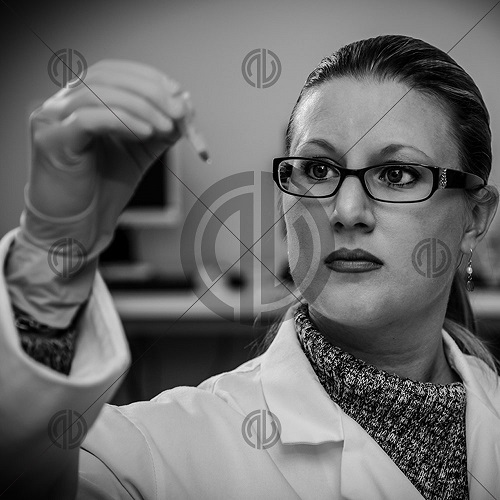</center>

![](https://darkdot.net/tahlil-yapan-doktor)

## <span style="color:blue">**CONTEXT**</span>

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

## <span style="color:blue">**CONTENT**</span>
1. age
1. sex
1. chest pain type (4 values)
1. resting blood pressure
1. serum cholestoral in mg/dl
1. fasting blood sugar > 120 mg/dl
1. resting electrocardiographic results (values 0,1,2)
1. maximum heart rate achieved
1. exercise induced angina
1. oldpeak = ST depression induced by exercise relative to rest
1. the slope of the peak exercise ST segment
1. number of major vessels (0-3) colored by flourosopy
1. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

### <span style="color:blue">**COLUMNS ( DATA FEATURES )**</span>
**age: **       age in years

**sex**:        (1 = male; 0 = female)

**cp**:         chest pain type

**trestbps**:   resting blood pressure (in mm Hg on admission to the hospital)

**chol**:       serum cholestoral in mg/dl

**fbs**:        (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**restecg**:    resting electrocardiographic results

**thalach**:    maximum heart rate achieved

**exang**:      exercise induced angina (1 = yes; 0 = no)

**oldpeak**:    ST depression induced by exercise relative to rest

**slope**:      the slope of the peak exercise ST segment

**ca**:         number of major vessels (0-3) colored by flourosopy

**thal**:       3 = normal; 6 = fixed defect; 7 = reversable defect

**target**:     1 or 0

# <center>LOAD BASIC LIBRARY AND DATASET</center>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization
import matplotlib.pyplot as plt
# read data
data=pd.read_csv("../input/heart-disease-uci/heart.csv")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

 ### <span style="color:blue">THE DATA AND EXAMINATION</span>

In [ ]:
df=data.copy() # Let's copy to protect the data
df.head()

In [ ]:
df.info()  # recognize the data

 *An interesting a dataset. A liitle more, please*

In [ ]:
df.isnull().sum()

Nicee job, no null values.
> Is it statistics?
> Okey let's look


In [ ]:
df.describe().T 

In [ ]:
df.shape

In [ ]:
# deeper
# How is the correlation idea?
df.corr()

I don't like this, very complicated 

In [ ]:
# It looks better
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between features")

  Let's check for our target variable "target"
*   Relatively high correlation with "cp", "thalach" ,"slope"
*   There is a different correlation with age and gender
*   Come on, let's  start visualizing  
  



## <span style="color:blue">DATA VISUALIZATION</span>

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(df['sex'],hue=df["target"], palette = 'pastel')
plt.title('Distribution of Target', fontsize = 15)
plt.show()

In [ ]:
with sns.axes_style('ticks'):   
    g = sns.factorplot("sex", data=df, hue="age", aspect=3,
                       kind="count")
    plt.title("Sex-Age")

In [ ]:
with sns.axes_style('ticks'):   
    g = sns.factorplot("age", data=df, hue="target", aspect=3,
                       kind="count")
    plt.title("Target-Age")

In [ ]:
plt.figure(figsize=(12,8))
sns.boxenplot(data['slope'], data['thalach'],hue=data["target"], palette = 'pastel')
plt.title('Relation of Sex and target', fontsize = 20, fontweight = 30)
plt.show()

In [ ]:
with sns.axes_style('darkgrid'): 
    plt.figure(figsize=(12,6))
    sns.swarmplot(x="cp",y="thalach",hue="target",data=df,size=8,palette="bright")
    plt.xlabel("CP Values")
    plt.ylabel("THALACH Values")
    plt.title("THALACH-TARGET-CP RELATIONSHIP")
    plt.show();

In [ ]:
sns.relplot(x="age",y="trestbps",hue="target",data=df)
plt.title("Age-Trestbps-Target Relationship")

In [ ]:
df["cp"]=df["cp"].astype("category")
df["slope"]=df["slope"].astype("category")
df["ca"]=df["ca"].astype("category")
df["thal"]=df["thal"].astype("category")

# <center>MODELING</center>

In [ ]:
df=pd.get_dummies(data=df,columns=["ca","cp","slope","thal"])

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
X=df.drop('target',axis=1)
y=df['target']

print("Shape of y:", y.shape)
print("Shape of data_x:", X.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### <span style="color:blue">STANDARDIZATION</span>

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
X_train

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# <center>MODELS</center>

## <span style="color:green">LOGISTIC REGRESSION MODEL</span>

In [ ]:
log_model=LogisticRegression()

In [ ]:
params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_cv = GridSearchCV(log_model,param_grid=params,cv=5)

In [ ]:
log_cv.fit(X_train,y_train)


In [ ]:
log_cv.best_params_

In [ ]:
log_tuned=LogisticRegression(C=0.1,penalty="l2").fit(X_train,y_train)
log_pred=log_tuned.predict(X_test)


In [ ]:
log_test_score = accuracy_score(y_test, log_tuned.predict(X_test)) 
log_train_score= accuracy_score(y_train, log_tuned.predict(X_train))
log_test_cross=cross_val_score(log_tuned,X_test,y_test,cv=5).mean()  
log_train_cross=cross_val_score(log_tuned,X_train,y_train,cv=5).mean() 
print("Test score: %",log_test_score)
print("Train score: %",log_train_score)
print("Test cross_val_score:%",log_test_cross*100)
print("Train cross_val_score: %",log_train_cross*100)

In [ ]:
print(classification_report(y_test,log_pred))

In [ ]:
log_cm=confusion_matrix(y_test,log_pred)
plt.figure(figsize = (10,7))
sns.heatmap(log_cm, annot=True,annot_kws={"size": 16})

## <span style="color:green">RANDOM FOREST CLASSIFIER MODEL</span>

In [ ]:
rf=RandomForestClassifier()

rf_params={"max_depth":[2,5,8,10],
          "min_samples_leaf":[1,3,10],
          "max_features":[2,5,8],
          "n_estimators": [30,50,100,300],
          "min_samples_split":[2,5]}

rf_cv=GridSearchCV(rf,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

In [ ]:
rf_cv.best_params_

In [ ]:
rf_tuned=RandomForestClassifier(max_depth=2,max_features=2,min_samples_leaf=1,min_samples_split=2,n_estimators=100,random_state=42).fit(X_train,y_train)
# rf_tuned=RandomForestClassifier(max_depth=8,max_features=2,min_samples_leaf=3,min_samples_split=5,n_estimators=50,random_state=42).fit(X_train,y_train)
rf_pred=rf_tuned.predict(X_test)

In [ ]:
rf_test_score = accuracy_score(y_test, rf_tuned.predict(X_test)) 
rf_train_score= accuracy_score(y_train, rf_tuned.predict(X_train))
rf_test_cross=cross_val_score(rf_tuned,X_test,y_test,cv=10).mean()  
rf_train_cross=cross_val_score(rf_tuned,X_train,y_train,cv=10).mean()  
print("Random Forest Test Score: %",rf_test_score*100)
print("Random Forest Train Score: %",rf_train_score*100)
print("Random Forest Test Cross Validation Score: %",rf_test_cross*100)
print("Random Forest Train Cross Validation Score: %",rf_train_cross*100)

In [ ]:
print(classification_report(y_test,rf_pred))

In [ ]:
rf_cm=confusion_matrix(y_test,rf_pred)
plt.figure(figsize = (10,7))
sns.heatmap(rf_cm, annot=True,annot_kws={"size": 16})

 ## <span style="color:green">K-NEIGBORS CLASSIFIERS</span>

In [ ]:
knn_model=KNeighborsClassifier()

knn_cv=GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': range(2,30)}, cv=5)
knn_cv.fit(X_train,y_train)
knn_cv.best_params_

In [ ]:
knn_tuned=KNeighborsClassifier(n_neighbors=19).fit(X_train,y_train)
knn_pred=knn_tuned.predict(X_test)


In [ ]:
knn_test_score = accuracy_score(y_test, knn_tuned.predict(X_test)) 
knn_train_score= accuracy_score(y_train, knn_tuned.predict(X_train))
knn_test_cross=cross_val_score(knn_tuned,X_test,y_test,cv=10).mean()  
knn_train_cross=cross_val_score(knn_tuned,X_train,y_train,cv=10).mean()  
print("KNN Test Score: %",knn_test_score*100)
print("KNN Train Score: %",knn_train_score*100)
print("KNN Test Cross Validation Score: %",knn_test_cross*100)
print("KNN Train Cross Validation Score: %",knn_train_cross*100)

In [ ]:
print(classification_report(y_test,knn_pred))

In [ ]:
knn_cm=confusion_matrix(y_test,knn_pred)
plt.figure(figsize = (10,7))
sns.heatmap(knn_cm, annot=True,annot_kws={"size": 16})

 ## <span style="color:green">ARTIFICIAL NEURAL NETWORK</span>

In [ ]:
from sklearn.neural_network import MLPClassifier
ysa=MLPClassifier()
param_grid ={
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,),(100,100,100)],
    'activation': ['tanh', 'relu','identity','logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05,0.01,0.1,0.5],
    
}
ysa_cv=GridSearchCV(ysa,param_grid,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

In [ ]:
ysa_cv.best_params_

In [ ]:
ysa_tuned=MLPClassifier(activation="relu",alpha=0.5,hidden_layer_sizes=(50,50,50),solver="sgd",random_state=42).fit(X_train,y_train)
ysa_pred=ysa_tuned.predict(X_test)

In [ ]:
ysa_test_score = accuracy_score(y_test, ysa_tuned.predict(X_test)) 
ysa_train_score= accuracy_score(y_train, ysa_tuned.predict(X_train))
ysa_test_cross=cross_val_score(ysa_tuned,X_test,y_test,cv=10).mean()  
ysa_train_cross=cross_val_score(ysa_tuned,X_train,y_train,cv=10).mean()  
print("Neural Network Forest Test Score: %",ysa_test_score*100)
print("Neural Network Train Score: %",ysa_train_score*100)
print("Neural Network Test Cross Validation Score: %",ysa_test_cross*100)
print("Neural Network Train Cross Validation Score: %",ysa_train_cross*100)

In [ ]:
print(classification_report(y_test,ysa_pred))

In [ ]:
ysa_cm=confusion_matrix(y_test,ysa_pred)
plt.figure(figsize = (10,7))
sns.heatmap(ysa_cm, annot=True,annot_kws={"size": 16})

 ## <span style="color:green">GRADIENT BOOSTING CLASSIFIER</span> 

In [ ]:
gbm_model=GradientBoostingClassifier(random_state=42)

gbm_params={
           "n_estimators":[100,150,200,250,300,400,500,600,700,800,900,100],
            "max_depth":[2,3,4,5,6,7,8,9,10],
           }

gbm_cv=GridSearchCV(gbm_model,gbm_params,cv=10,n_jobs=-1,verbose=2)
gbm_cv.fit(X_train,y_train)

In [ ]:
gbm_cv.best_params_

In [ ]:
gbm_tuned=GradientBoostingClassifier(max_depth=2,n_estimators=100,random_state=0).fit(X_train,y_train)

In [ ]:
gbm_test_score = accuracy_score(y_test, gbm_tuned.predict(X_test)) 
gbm_train_score= accuracy_score(y_train, gbm_tuned.predict(X_train))
gbm_test_cross=cross_val_score(gbm_tuned,X_test,y_test,cv=10).mean()  
gbm_train_cross=cross_val_score(gbm_tuned,X_train,y_train,cv=10).mean()  

In [ ]:
print("Gradient Boosting Test Score: %",gbm_test_score*100)
print("Gradient Boostingk Train Score: %",gbm_train_score*100)
print("Gradient Boosting Test Cross Validation Score: %",gbm_test_cross*100)
print("Gradient Boosting Train Cross Validation Score: %",gbm_train_cross*100)

In [ ]:
print(classification_report(y_test, gbm_tuned.predict(X_test)))

In [ ]:
gbm_cm=confusion_matrix(y_test, gbm_tuned.predict(X_test))
plt.figure(figsize = (10,7))
sns.heatmap(gbm_cm, annot=True,annot_kws={"size": 16})

 ## <span style="color:green">XGB CLASSIFIER</span>  

In [ ]:
xgb=XGBClassifier()

xgb_params={"n_estimators":[100,300,500,1000],
           "max_depth":[5,6,7,8],
           "learning_rate":[0.1,0.01,0.001,0.02,0.05],
           "min_samples_split":[2,5]}

xgb_cv=GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2)
xgb_cv.fit(X_train,y_train)

In [ ]:
xgb_cv.best_params_

In [ ]:
xgb_tuned=XGBClassifier(learning_rate=0.05,max_depth=8,min_samples_split=2,n_estimators=100).fit(X_train,y_train)

In [ ]:
xgb_pred=xgb_tuned.predict(X_test)

In [ ]:
xgb_test_score = accuracy_score(y_test, xgb_tuned.predict(X_test)) 
xgb_train_score= accuracy_score(y_train, xgb_tuned.predict(X_train))
xgb_test_cross=cross_val_score(xgb_tuned,X_test,y_test,cv=10).mean()  
xgb_train_cross=cross_val_score(xgb_tuned,X_train,y_train,cv=10).mean()  
print("XGradient Boosting Test Score: %",xgb_test_score*100)
print("XGradient Boostingk Train Score: %",xgb_train_score*100)
print("XGradient Boosting Test Cross Validation Score: %",xgb_test_cross*100)
print("XGradient Boosting Train Cross Validation Score: %",xgb_train_cross*100)

In [ ]:
print(classification_report(y_test,xgb_tuned.predict(X_test)))

In [ ]:
xgb_cm=confusion_matrix(y_test, xgb_tuned.predict(X_test))
plt.figure(figsize = (10,7))
sns.heatmap(xgb_cm, annot=True,annot_kws={"size": 16})

 ## <span style="color:green">   LIGHT GBM Classifier</span>

In [ ]:
lgbm=LGBMClassifier()

lgbm_params={"n_estimators":[100,500,1000,2000],
            "subsample":[0.6,0.8,1.0],
            "max_depth":[3,4,5,6],
            "learning_rate":[0.1,0.01,0.02,0.05],
            "min_child_samples":[5,10,20]}

lgbm_cv=GridSearchCV(lgbm,lgbm_params,cv=10,n_jobs=-1,verbose=2)
lgbm_cv.fit(X_train,y_train)

In [ ]:
lgbm_cv.best_params_

In [ ]:
lgbm_tuned=LGBMClassifier(learning_rate=0.01,max_depth=3,min_child_samples=20,n_estimators=500,subsample=0.6).fit(X_train,y_train)



In [ ]:
lgbm_pred=lgbm_tuned.predict(X_test)

In [ ]:
lgbm_test_score = accuracy_score(y_test, lgbm_tuned.predict(X_test)) 
lgbm_train_score= accuracy_score(y_train, lgbm_tuned.predict(X_train))
lgbm_test_cross=cross_val_score(lgbm_tuned,X_test,y_test,cv=10).mean()  
lgbm_train_cross=cross_val_score(lgbm_tuned,X_train,y_train,cv=10).mean() 
print("Light Gradient Boosting Test Score: %",lgbm_test_score*100)
print("Light Gradient Boosting Train Score: %",lgbm_train_score*100)
print("Light Gradient Boosting Test Cross Validation Score: %",lgbm_test_cross*100)
print("Light Gradient Boosting Train Cross Validation Score: %",lgbm_train_cross*100)

In [ ]:
print(classification_report(y_test,lgbm_pred))

In [ ]:
lgbm_cm=confusion_matrix(y_test, lgbm_tuned.predict(X_test))
plt.figure(figsize = (10,7))
sns.heatmap(lgbm_cm, annot=True,annot_kws={"size": 16})

 ## <span style="color:green"> CATBOOST CLASSIFIER</span>

In [ ]:
cat=CatBoostClassifier()

cat_params={"iterations":[200,300,400,500],
           "learning_rate":[0.01,0.05,0.1],
           "depth":[3,5,8]}

cat_cv=GridSearchCV(cat,cat_params,cv=10,n_jobs=-1,verbose=2)
cat_cv.fit(X_train,y_train)

In [ ]:
cat_cv.best_params_

In [ ]:
cat_tuned=CatBoostClassifier(depth=3,iterations=200,learning_rate=0.01).fit(X_train,y_train)
cat_pred=cat_tuned.predict(X_test)

In [ ]:
cat_test_score = accuracy_score(y_test, cat_tuned.predict(X_test)) 
cat_train_score= accuracy_score(y_train, cat_tuned.predict(X_train))
cat_test_cross=cross_val_score(cat_tuned,X_test,y_test,cv=10).mean()  
cat_train_cross=cross_val_score(cat_tuned,X_train,y_train,cv=10).mean()  
print("CatBoost Test Score: %",cat_test_score*100)
print("CatBoost Train Score: %",cat_train_score*100)
print("CatBoost Test Cross Validation Score: %",cat_test_cross*100)
print("CatBoost Train Cross Validation Score: %",cat_train_cross*100)

### <span style="color:green">ALL RESULTS</span>

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'k-Nearest Neighbors', 
        
               'Random Forest',  'XGBClassifier', 'LGBMClassifier',
              'GradientBoostingClassifier', 'Neural Network'],
    
    'Score_train': [log_train_score,knn_train_score,rf_train_score,xgb_train_score,lgbm_train_score,gbm_train_score,ysa_train_score],
    'Score_test': [log_test_score,knn_test_score,rf_test_score,xgb_test_score,lgbm_test_score,gbm_test_score,ysa_test_score],
                    
    "Cross_val_score_train":[log_train_cross,knn_train_cross,rf_train_cross,xgb_train_cross,lgbm_train_cross,gbm_train_cross,ysa_train_cross],
    "Cross_val_score_test": [log_test_cross,knn_test_cross,rf_test_cross,xgb_test_cross,lgbm_test_cross,gbm_test_cross,ysa_test_cross] })

In [ ]:
models

## CONCLUSION

### Which model do you think is the best?
### Thank you for coming here 

There is a lot more to learn: D